In [61]:
import pandas as pd

df = pd.read_csv("/content/dane7.csv")


In [62]:
# Czesc 1 Zamień skróty nazw dni tygodnia na polskie odpowiedniki (pełne nazwy dni tygodnia) - kolumna created_at
dni_tygodnia = {'Mon': 'Poniedziałek', 'Tue': 'Wtorek', 'Wed': 'Środa', 'Thu': 'Czwartek', 'Fri': 'Piątek', 'Sat': 'Sobota', 'Sun': 'Niedziela'}
df['created_at'] = df['created_at'].apply(lambda x: dni_tygodnia[x.split()[0]])

In [63]:
df['created_at']

0       Piątek
1       Piątek
2       Piątek
3       Piątek
4       Piątek
         ...  
5097    Wtorek
5098    Wtorek
5099    Wtorek
5100    Wtorek
5101    Wtorek
Name: created_at, Length: 5102, dtype: object

In [64]:
# Zamień skróty nazw miesięcy na liczbowe odpowiedniki (np Jun na 06) - kolumna user_created_at
nazwy_miesiecy = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}
df['user_created_at'] = df['user_created_at'].apply(lambda x: x.split()[0] + " " + nazwy_miesiecy[x.split()[1]] + ' ' + " ".join(x.split()[2:]))


In [65]:
df['user_created_at']

0       Sun 05 24 20:01:26 +0000 2015
1       Sat 02 23 20:23:00 +0000 2019
2       Wed 11 18 17:55:16 +0000 2020
3       Thu 03 08 16:03:40 +0000 2018
4       Sat 07 27 13:22:01 +0000 2019
                    ...              
5097    Sun 07 05 08:04:13 +0000 2020
5098    Sun 07 12 07:08:16 +0000 2020
5099    Mon 07 23 08:28:16 +0000 2012
5100    Sun 03 18 05:07:47 +0000 2018
5101    Thu 03 12 02:01:58 +0000 2015
Name: user_created_at, Length: 5102, dtype: object

In [66]:
# Pobierz wszystkie linki do tweetów i przekaż je do listy
tweet_links = df['tweet_url'].tolist()


In [ ]:
tweet_links

In [68]:
# Pobierz wszystkie linki znajdujące się w tweetach i przekaż je do listy (kolumna urls)
import re
all_urls = []
for urls in df['text'].apply(lambda x: re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', x)):
    all_urls.extend(urls)

In [69]:
# Pobierz wszystkie linki do obrazków i przekaż je do listy (kolumna media).
image_links = df['media'].dropna().tolist()

In [70]:
# Usuń wszystkie słowa oznaczone jako stopwords i przekaż oczyszczony tekst do nowej kolumny o nazwie text_without_stopwords
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
from nltk.corpus import stopwords


In [75]:
stoplist = stopwords.words('english')

In [73]:
stop_words = set(stopwords.words('english'))
df['text_without_stopwords'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))


In [ ]:
df['text_without_stopwords']

In [76]:
# Czesc 2 - Wypisz top5 tweetów z największą liczbą polubień
top_liked_tweets = df.nlargest(5, 'favorite_count')['text']


In [77]:
top_liked_tweets

484     Dziś z prezydent-elekt @Tsihanouskaya mówiliśm...
1124    Warszawa czeka na @Tsihanouskaya. #StandWithBe...
4770    Jasio, który nie panuje nad swoją jadaczką, zn...
3692    Czyli prezydenci opozycji: \n👉Poznań -cieszy s...
3193    Pierwszy z 21 nowych pociągów @SKM_Warszawa ju...
Name: text, dtype: object

In [78]:
# Wypisz top5 tweetów z największą liczbą retweetów
top_retweeted_tweets = df.nlargest(5, 'retweet_count')['text']

In [79]:
top_retweeted_tweets

4396    HALO WARSZAWA\nchętnie rozjaśnię, ufarbuję, ze...
618     ‼️\nA teraz perełka. Finał Was rozwali. \n10-1...
1173    UWAGA #Warszawa Śniadeckich 12/16\n\nPani Danu...
3915    UWAGA #Warszawa Śniadeckich 12/16\n\nPani Danu...
4758    UWAGA #Warszawa Śniadeckich 12/16\n\nPani Danu...
Name: text, dtype: object

In [81]:
# Wyświetl tylko te tweety, które nie są uznane jako “wrażliwe” (kolumna possibly_sensitive)
tweets_non_sensitive = df[df['possibly_sensitive'] == False]['text']

In [82]:
tweets_non_sensitive

7       W uroczystości wzięła udział https://t.co/V8xU...
9       To właśnie w tym miejscu przedwojenna Warszawa...
15      Park został otwarty dla mieszkańców w 1955 rok...
16      @galopujacymajor sobie gdzieś tam libkuje poza...
17      61 lat temu zmarł gen. Józef Haller. \nIPN i W...
                              ...                        
5068    Dla tego debil Warszawa to zawsze Warschau htt...
5070    #kosaciecżółty zasiedla stanowiska o pozwyższo...
5072    📆#Tegodnia 4️⃣3️⃣ LATA TEMU\n\nW Argentynie ro...
5076    W tunelu południowej obwodnicy Warszawy pod Ur...
5087    Wszystkiego najlepszego, Drogie Dzieci 🍬🍭\nZap...
Name: text, Length: 1701, dtype: object

In [91]:
# Wyświetl tweety użytkownika, który założył konto najwcześniej (spośród wszystkich użytkowników w datasecie) (kolumna user_created_at)
df['user_created_at'] = pd.to_datetime(df['user_created_at'])
earliest_user = df.loc[df['user_created_at'].idxmin(), 'user_screen_name']
earliest_user_tweets = df[df['user_screen_name'] == earliest_user]['text']



In [92]:
earliest_user_tweets

3772    Policjanci z wydziału do walki z przestępczośc...
Name: text, dtype: object

In [93]:
# Wyświetl tweety użytkownika, który ma najwięcej followersów
most_followed_user_tweets = df[df['user_followers_count'] == df['user_followers_count'].max()]['text']

In [94]:
most_followed_user_tweets

1550    "Jego spokój pozytywnie udziela się pozostałym...
1792    Zarząd Transportu Miejskiego zapowiada, że czę...
2683    "Tylko w ostatnich czterech dniach zaszczepili...
2720    W środę po południu w okolicach mostu Świętokr...
4073    Sprawcy szuka policja.\n\nhttps://t.co/J5YwjOPMTy
4737    Aktywista miejski Jan Śpiewak przegrał proces ...
4911    W poniedziałek późnym wieczorem na Mokotowie z...
Name: text, dtype: object

In [97]:
# Wyświetl tylko zweryfikowanych użytkowników (kolumna user_verified)
verified_users_tweets = df[df['user_verified'] == True]['user_screen_name']

In [98]:
verified_users_tweets

15          tvnwarszawa
31      gazeta_wyborcza
49          tvnwarszawa
105         adamSzlapka
132         tvnwarszawa
             ...       
5003       j_wisniewska
5023     parents4future
5034       DGWdowodztwo
5049        tvnwarszawa
5069      MariuszTrepka
Name: user_screen_name, Length: 191, dtype: object

In [99]:
# Podaj, w który dzień tygodnia najczęściej były publikowane tweety z datasetu
most_common_day = df['created_at'].mode()[0]


In [100]:
most_common_day

'Środa'

In [101]:
#Czesc 3

import spacy

In [ ]:
!pip install spacy -U
!python -m spacy download pl_core_news_lg


In [105]:
nlp = spacy.load('pl_core_news_lg')

In [120]:
text = "Naszym zdaniem nikt nie zarejestrował wielkiej fali demonstracji publicznych ostatnich lat lepiej niż fotografowie związani z Archiwum Protestów Publicznych Chcecie sprawdzić czy się z nami zgadzaci Bądźcie jutro, na Placu Defilad Święto Warszawy "

In [121]:
def extract_entities(text):
    doc = nlp(text)
    persons = [ent.text for ent in doc.ents if ent.label_ == 'PER']
    places = [ent.text for ent in doc.ents if ent.label_ == 'LOC']
    organizations = [ent.text for ent in doc.ents if ent.label_ == 'ORG']
    return persons, places, organizations

In [122]:
data = {'text': [text]}
df = pd.DataFrame(data)

In [123]:
df[['persons', 'places', 'organizations']] = df['text'].apply(lambda x: pd.Series(extract_entities(x)))


In [125]:
print(df)


                                                text persons places  \
0  Naszym zdaniem nikt nie zarejestrował wielkiej...      []     []   

  organizations  
0            []  


In [ ]:
#Czesc 4

In [145]:
import matplotlib.pyplot as plt

In [146]:
df = pd.read_csv('dane7.csv')


In [147]:
df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S %z %Y')


In [163]:
df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S %z %Y')



In [164]:
df['day_of_week'] = df['created_at'].dt.day_name()


In [165]:
df['day_of_week']

0        Friday
1        Friday
2        Friday
3        Friday
4        Friday
         ...   
5097    Tuesday
5098    Tuesday
5099    Tuesday
5100    Tuesday
5101    Tuesday
Name: day_of_week, Length: 5102, dtype: object

In [166]:
tweet_count_per_day = df['day_of_week'].value_counts().sort_index()


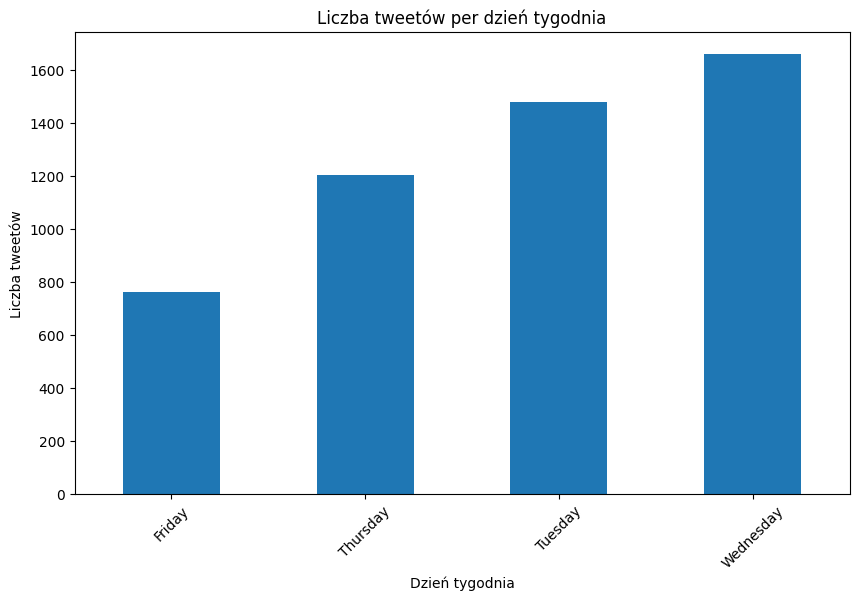

In [168]:
plt.figure(figsize=(10,6))
tweet_count_per_day.plot(kind='bar')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba tweetów')
plt.title('Liczba tweetów per dzień tygodnia')
plt.xticks(rotation=45)
plt.show()